# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [295]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [296]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.0000,440.0000,440.0000,440.0000,440.0000,440.0000
mean,"12,000.2977","5,796.2659","7,951.2773","3,071.9318","2,881.4932","1,524.8705"
std,"12,647.3289","7,380.3772","9,503.1628","4,854.6733","4,767.8544","2,820.1059"
min,3.0000,55.0000,3.0000,25.0000,3.0000,3.0000
25%,"3,127.7500","1,533.0000","2,153.0000",742.2500,256.7500,408.2500
50%,"8,504.0000","3,627.0000","4,755.5000","1,526.0000",816.5000,965.5000
75%,"16,933.7500","7,190.2500","10,655.7500","3,554.2500","3,922.0000","1,820.2500"
max,"112,151.0000","73,498.0000","92,780.0000","60,869.0000","40,827.0000","47,943.0000"


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [297]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [42, 240, 355]
# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys())
samples

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
42,10850,7555,14961,188,6899,46
240,22096,3575,7041,11422,343,2564
355,190,727,2012,245,184,127


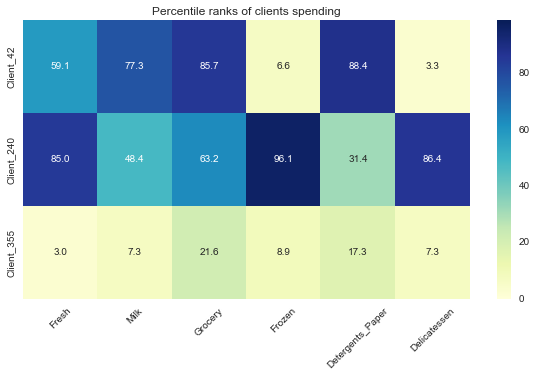

In [298]:
# calculate percentile ranks
pcts = 100*data.rank(axis=0, pct='True').iloc[indices].round(decimals = 3)

# visualization with heatmap

fig, ax = plt.subplots(1,1, figsize = (10,5))

sns.heatmap(pcts, vmin = 0, vmax = 99, annot = True, fmt = '.1f', cbar = True, cmap = 'YlGnBu',
           yticklabels = ['Client_'+ str(i) for i in indices])
plt.title('Percentile ranks of clients spending')
plt.xticks(rotation = 45, ha = 'center');

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**

Customer 42 demonstrates relatively little interest in Delicatessen and Frozen products. Customer shows roughly an average interest in Fresh and Milk products and above an average interest in Detergents_Paper and Grocery products. It is reasonable to suggest that it can be a retailer orientated on not premium products. Also it seems like it does not have enough refregirators to trade with Frozen products.

Customer 240 buys a lot of Frozen and Fresh products. Also the intereset in Delicatessen products is above an average. The interest in Grocery and Milk products is a bit less than average, with Milk less popular than Grocery. It shows comparatively little interest in Detergents_Paper products. As to customer spending behaviour, it could be a chain of supermarkets.

Customer 355 could be a restaurant or mid-size supermarket as it shows an intrest accross all products equally, but the total expenditure is well below an average one.  

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [299]:
from sklearn.cross_validation import train_test_split as tts
from sklearn.tree import DecisionTreeRegressor as DTR
regressor = DTR(random_state = 3)

for column in data.columns:
    # TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
    target = data.loc[:, column]
    new_data = data.drop([column], axis = 1)
    
    # TODO: Split the data into training and testing sets using the given feature as the target
    X_train, X_test, y_train, y_test = tts(new_data, target, train_size = 0.75, random_state = 3)
    
    # TODO: Create a decision tree regressor and fit it to the training set
    regressor.fit(X_train, y_train)
    score = regressor.score(X_test, y_test)
    
    #print results
    print 'Feature selected: {}\nScore: {}\n'.format(column, score)

Feature selected: Fresh
Score: -0.821220389834

Feature selected: Milk
Score: 0.395040035446

Feature selected: Grocery
Score: 0.700062558033

Feature selected: Frozen
Score: -5.74293504155

Feature selected: Detergents_Paper
Score: 0.563935330016

Feature selected: Delicatessen
Score: -0.531183723252



### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**

As negative R^2 implies the model fails to fit the data, we can say that neither Fresh, Frozen or Delicatessen features have strong correaltion with other five features. As non of them can be replaced by combinations of others, these features are relevant for understanding customer purchasing. 

High value of R^2 indicates that feature has strong correlation with a set of other features. It means such feature can be replaced by combination of other features. So it is possible to derive feature's value even if it is not in dataset. Hence, we can remove this feature from dataset without loosing much information. Thus, Grocery feature with R^2 = 0.7 can be removed to reduce dimensinoality of dataset.

As to Detergents_Paper (DP) and Milk (M) features they also demostrate some correlation, each with other five features. If one feature needs to be removed from dataset, but it cannot be Grocery, then DP and M are good candidates for consideration. 

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

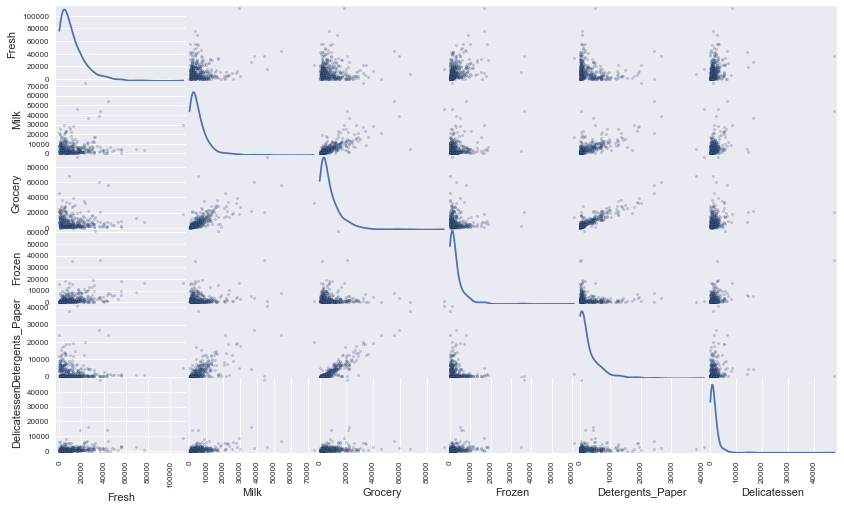

In [300]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

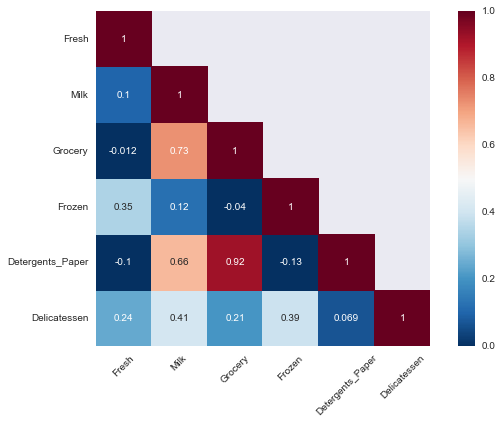

In [301]:
#find correlation coefficients for each pair of features, print as a table
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True

fig, ax = plt.subplots(1,1, figsize = (10,6))

with sns.axes_style("white"):
    ax = sns.heatmap(corr, cbar = True, vmin = 0, vmax = 1, annot = True, mask = mask, cmap='RdBu_r', square= True);
    plt.xticks(rotation = 45, ha = 'center')

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**

Grocery (G) and Detergents_Paper (DP) have strong correlation as R^2 = 0.92. Grocery (G) feature shows good correlation with Milk (M) feature as R^2 = 0.73. DP and M features demonstrate some correlation, although not as strong as pairs with G feature. This is observed from scatter plot as well, G and DP plot shows points scattering around a line. Less obvious linear relationship is observed for G and M, DP and M pairs. Plots for other pairs do not demonstrate any linear relationships. Results prove what was found in Feature Relevance analysis.

Each feature distribution is not normal as symmetrical bell-shaped line is not observable. It looks like the the feature's distribution fall into a log-normal distribution. The distributions are positively skewed as long tails moving to the right. The property of positive skewness states that mean > median > mode. This confirms description of data set obtained earlier. 

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

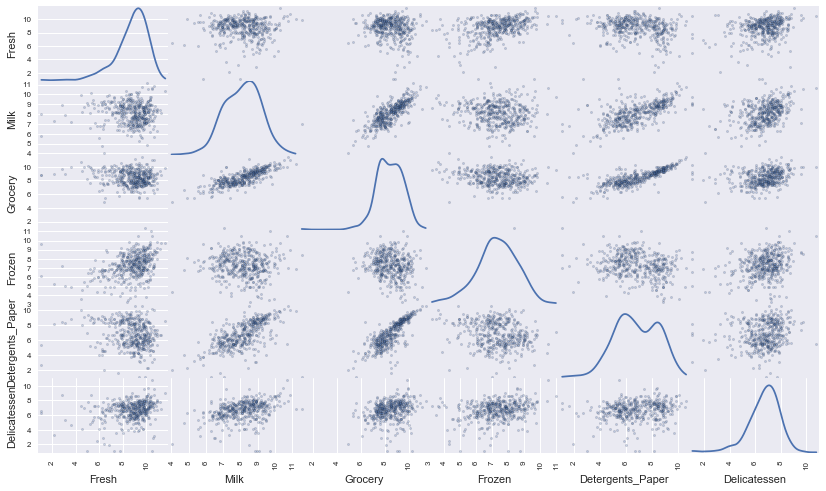

In [302]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

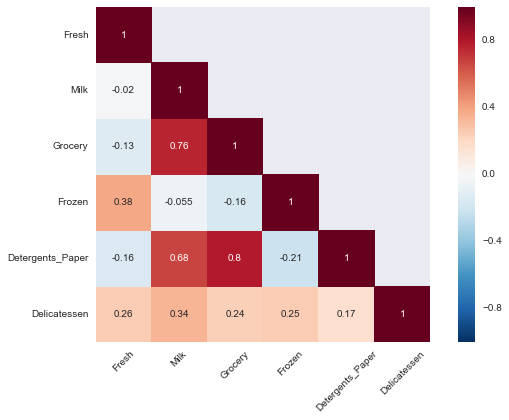

In [303]:
corr = log_data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True

fig, ax = plt.subplots(1,1, figsize = (10,6))

sns.heatmap(corr, annot = True, mask = mask, square = True)
plt.xticks(rotation = 45);

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

Distributions apper to be more normal. DP and G features still have strong correlation, although it is weaker than before. Correletaion between DP and M features, G and M features increased slightly, but still weaker than correlation between DP and G features. 

In [304]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
42,9.2919,8.9300,9.6132,5.2364,8.8391,3.8286
240,10.0032,8.1817,8.8595,9.3433,5.8377,7.8493
355,5.2470,6.5889,7.6069,5.5013,5.2149,4.8442


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [305]:
# List for all outliers found
all_outliers = []

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3-Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    all_outliers = all_outliers + list(log_data[~((log_data[feature] >= Q1 - step) 
                                    & (log_data[feature] <= Q3 + step))].index)
    

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.4427,9.9503,10.7327,3.5835,10.0954,7.2605
66,2.1972,7.3356,8.9115,5.1648,8.1513,3.2958
81,5.3891,9.1632,9.5752,5.6454,8.9642,5.0499
95,1.0986,7.9793,8.7407,6.0868,5.4072,6.5639
96,3.1355,7.8694,9.0018,4.9767,8.2620,5.3799
128,4.9416,9.0878,8.2488,4.9558,6.9679,1.0986
171,5.2983,10.1605,9.8942,6.4785,9.0794,8.7403
193,5.1930,8.1562,9.9180,6.8659,8.6337,6.5013
218,2.8904,8.9232,9.6294,7.1585,8.4757,8.7597
304,5.0814,8.9173,10.1175,6.4249,9.3744,7.7874


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.0400,11.2050,10.3770,6.8947,9.9070,6.8057
98,6.2206,4.7185,6.6567,6.7968,4.0254,4.8828
154,6.4329,4.0073,4.9200,4.3175,1.9459,2.0794
356,10.0295,4.8978,5.3845,8.0574,2.1972,6.3063


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.9232,7.0361,1.0986,8.3909,1.0986,6.8824
154,6.4329,4.0073,4.9200,4.3175,1.9459,2.0794


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.4319,9.6633,9.7237,3.4965,8.8474,6.0707
57,8.5973,9.2036,9.2579,3.6376,8.9322,7.1562
65,4.4427,9.9503,10.7327,3.5835,10.0954,7.2605
145,10.0006,9.0341,10.4571,3.7377,9.4407,8.3962
175,7.7592,8.9676,9.3821,3.9512,8.3419,7.4366
264,6.9782,9.1777,9.6450,4.1109,8.6962,7.1428
325,10.3957,9.7282,9.5197,11.0165,7.1483,8.6321
420,8.4020,8.5690,9.4900,3.2189,8.8273,7.2392
429,9.0603,7.4674,8.1831,3.8501,4.4308,7.8244
439,7.9327,7.4372,7.8280,4.1744,6.1675,3.9512


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.9232,7.0361,1.0986,8.3909,1.0986,6.8824
161,9.4282,6.2916,5.6454,6.9958,1.0986,7.7111


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.1972,7.3356,8.9115,5.1648,8.1513,3.2958
109,7.2485,9.7249,10.2746,6.5117,6.7286,1.0986
128,4.9416,9.0878,8.2488,4.9558,6.9679,1.0986
137,8.0350,8.9971,9.0218,6.4938,6.5806,3.5835
142,10.5196,8.8751,9.0183,8.0047,2.9957,1.0986
154,6.4329,4.0073,4.9200,4.3175,1.9459,2.0794
183,10.5145,10.6908,9.9120,10.5060,5.4765,10.7778
184,5.7900,6.8222,8.4574,4.3041,5.8111,2.3979
187,7.7989,8.9874,9.1921,8.7434,8.1487,1.0986
203,6.3682,6.5294,7.7035,6.1506,6.8607,2.8904


In [306]:
# get outliers which occur in more than one feature
candidates = [(value, all_outliers.count(value)) for value in set(all_outliers)]
candidates = [value[0] for pos, value in enumerate(candidates) if candidates[pos][1] > 1]

#print outliers 
print 'Customers with outliers occured accros multiple features: {}'.format(candidates)
data.loc[candidates]

Customers with outliers occured accros multiple features: [128, 154, 65, 66, 75]


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
128,140,8847,3823,142,1062,3
154,622,55,137,75,7,8
65,85,20959,45828,36,24231,1423
66,9,1534,7417,175,3468,27
75,20398,1137,3,4407,3,975


### Question 4
*Are there any data points considered outliers for more than one feature? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**

Customers 128, 154, 65, 66, 75 have spent uncommon amounts accros more than one product. The amounts spent by these customers are extreme values which affect the expenditure pattern accross all customers. Removing these values 'protects' an expenditure pattern. From the other side, removing may lead to loosing some relevant information about customers. Thus, it is important to assure there is a reason to remove customers from the dataset. 

Let's consider customer 154 who have spent 'extremely' small amounts on Delicatessen, Grocery and Milk. The amounts spent are low across other products as well. It seems like the customer runs the business of very small size, not tipical for other customers. Since there is only one such customer, it is reasonable to remove it from the dataset so that it does not affect the whole expenditure pattern. 

It is reasonalble to remove other customers as well, since showing no interest for more than one product is abnormal behaviour for distributor clients. 

In [307]:
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = [128, 154, 65, 66, 75]

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

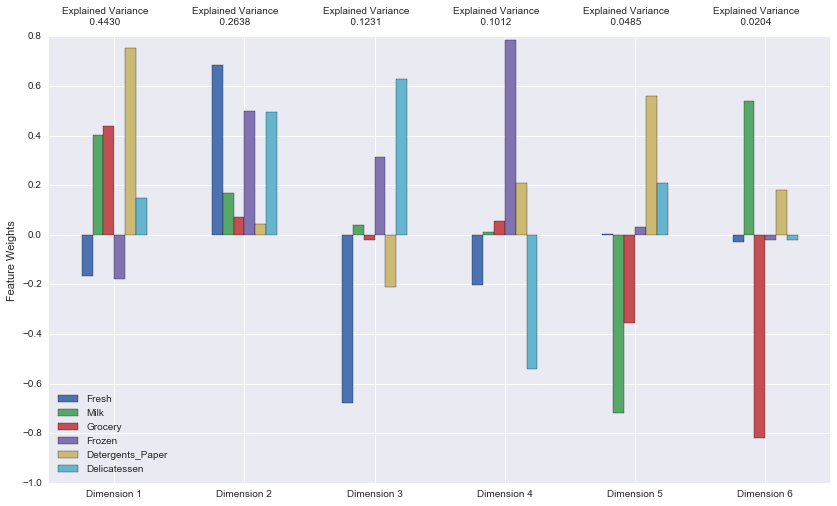

In [308]:
from sklearn.decomposition import PCA
# TODO: Apply PCA to the good data with the same number of dimensions as features
pca = PCA()
pca.fit(good_data)

# TODO: Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**

First and second principal components explain 44.3% and 26.38% of variance in the data respectively. In total, they explain 70.68% of variance. 

First four principal components explain 93.11% of variance in the data.

First principal component has strong positive correlation with Detergent_Papers feature and good positive correlation with Milk and Grocery feature. It would be right to say that clients with high positive values of first principal component would tend to spend a lot on Detergent_Papers. Also, it is right to say that if client buys more Detergent_Papers, it buys more Milk and Grocery as well. 

Negative values of component suggest the customer is not interested in the corresponding product. 

Second principal component explains well Fresh feature. Clients with high positive values of second component would tend to spend a lot on Fresh products. Also if these clients buy more Fresh products, they tend to buy more Frozen and Delicatessen products. 

Third component explains well Fresh and Delicatessen features. Clients with high values of third component will tend to buy a lot of Delicatessen and very small number of Fresh products. Those with high negative value of principal component spend more on Fresh and a bit on Delicatessen.

Fourth component explains Frozen and Delicatessen. Clients with high positive values of forth components tend to buy a lot of Frozen and a bit of Delicatessen. Those with high negative value of principal component spend more on Delicatessen and a bit on Fresh.

It is worth to note that although fifth and sixth principal components do not explain total variation much, they capture Milk and Grocery features, respectively. Clients with high values of fifth component tend to buy small number of Milk products. Clients with high values of sixth component tend to buy small number of Grocery products.


### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [309]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,2.2146,-1.7988,-3.2371,0.3088,-0.5148,-0.0568
1,-0.9197,2.4257,0.7222,0.5280,-0.4052,-0.5744
2,-1.5451,-4.6262,0.9369,-0.1090,0.0698,-0.2437


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [310]:
# TODO: Fit PCA to the good data using only two dimensions
pca = PCA(n_components = 2)
pca.fit(good_data)

# TODO: Apply a PCA transformation the good data
reduced_data = pca.transform(good_data)

# TODO: Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

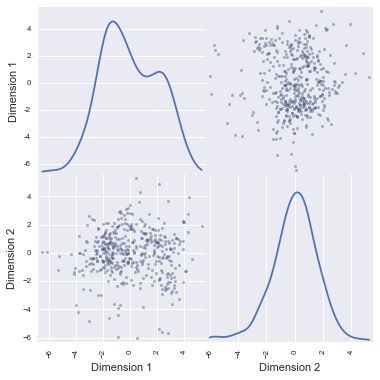

In [311]:
#scatter matrix for pca reduced data
pd.scatter_matrix(reduced_data, figsize = (6,6), diagonal = 'kde');

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [312]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,2.2146,-1.7988
1,-0.9197,2.4257
2,-1.5451,-4.6262


## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**

Advantages to using K-means clustering algorithm:

- simplicity: only number of clusters K is required to start the algorithm.

- relatively efficient: O(tknd), where n is number of objects, k is number of clusters, d is number of  dimension of each object, and t is number of iterations. Normally, k, t, d << n.

- algorithm gives the best result when data subsets are distinct or well separated from each other

Advantages to using a Gaussian Mixture Model clustering algorithm:

- 'soft' classification is available: for each data point the probability of beloning to each class is provided

- flexibility in choosing the component distribution

- ability to obtain a density estimation for each cluster


The data are not well separated into subsets/groups of clients. It comes from the principal component analysis. Let's consider sampled client with index 0. Principle components 2 and 3 have high negative values, but components suggest contrary information as to client's spending pattern. The same ambiguity is observed for client with index 1, but values are both high positive. So with certain probability clients may follow two different spending patterns. Thus it would less efficient to use K-means. Gaussian Mixture Model (GMM) is preferable as it captures such points providing with probabilities of class belonging.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

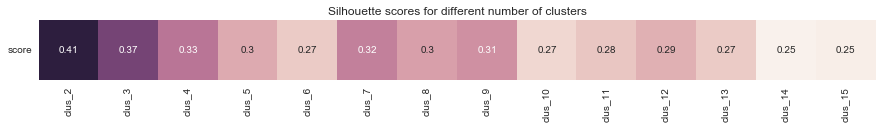

In [313]:
from sklearn.mixture import GMM
from sklearn.metrics import silhouette_score

#apply GMM to data and return predictions ,centers and score for passed number
def apply_GMM(data, number):
    
        # TODO: Apply your clustering algorithm of choice to the reduced data
        clusterer = GMM(number, random_state = 3).fit(reduced_data)

        # TODO: Predict the cluster for each data point
        preds = clusterer.predict(reduced_data)

        # TODO: Find the cluster centers
        centers = clusterer.means_

        # TODO: Predict the cluster for each transformed sample data point
        sample_preds = clusterer.predict(pca_samples)

        # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
        score = np.round(silhouette_score(reduced_data, preds), 4)
        
        return preds, centers, sample_preds, score

hi_score = 0
scores = {}

for n in range(2, 16):
    preds, centers, sample_preds, score = apply_GMM(reduced_data, n)
    
    scores[n] = score
    
    if score > hi_score:
        hi_score = score
        best_preds = preds
        best_centers = centers
        best_sample_preds = sample_preds

# print silhouette scores
df_scores = pd.DataFrame.from_dict([scores])

fig, ax1  = plt.subplots(1,1, figsize = (15, 10))

sns.heatmap(df_scores, square = True, cbar = False, annot = True, 
           xticklabels = ['clus_'+str(i) for i in range(2,16)],
           yticklabels = ['score'], 
           ax = ax1)
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.title('Silhouette scores for different number of clusters');

### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**

Silhouette score is highest (0.4118) when the number of clusters is 2.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

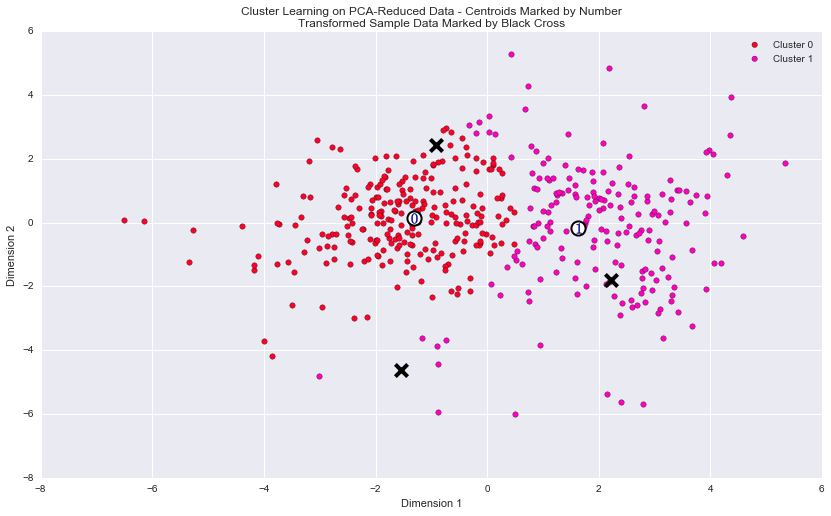

In [314]:
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, best_preds, best_centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [315]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(best_centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(best_centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,"8,812.0000","2,052.0000","2,689.0000","2,058.0000",337.0000,712.0000
Segment 1,"4,316.0000","6,347.0000","9,555.0000","1,036.0000","3,046.0000",945.0000


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

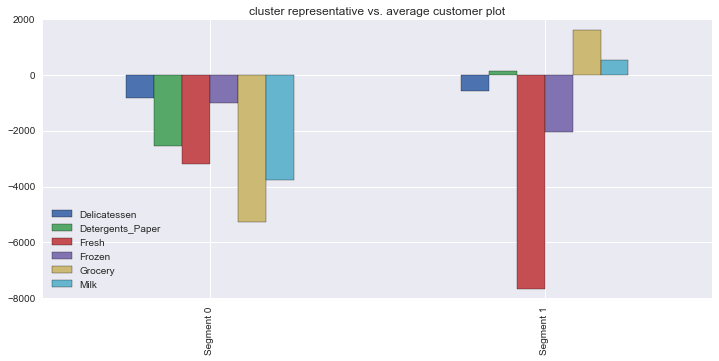

In [316]:
#cluster representative vs. average customer
# values are not standardised by std(), bars represent difference in absolute units.
standard = {}
for feature in list(data.columns):
    standard[feature] = (true_centers[feature] - data[feature].mean())
standard_segments = pd.DataFrame(standard)

#plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (12, 5))
ax = standard_segments.plot.bar(ax = ax)
plt.title('cluster representative vs. average customer plot');

**Answer:**
 
Segment 0's set of establishments:
    - small/mid size supermarkets, restaurants, cafes.
Segment 1's set of establishments:
    - supermarket chains, retailers.

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [317]:
# Display the predictions
for i, pred in enumerate(best_sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


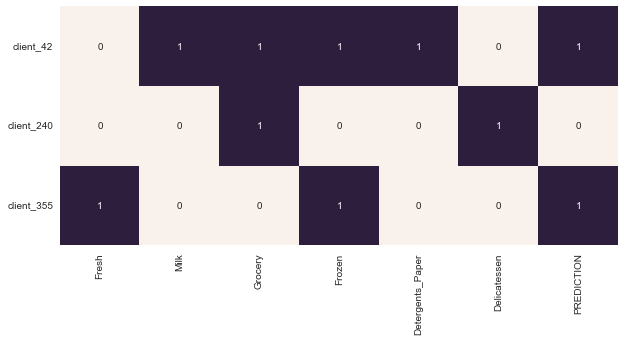

In [318]:
# check if sample's spending is closer to segment 0 or 1
samples = samples.reset_index(drop = True)
df_diff = (np.abs(samples - true_centers.iloc[0]) < np.abs(samples - true_centers.iloc[1])).applymap(lambda x: 0 if x else 1)

#add predictions to df
df_final = pd.concat([df_diff, pd.Series(best_sample_preds, name = 'PREDICTION')], axis = 1)

#visualise results
fig, ax = plt.subplots(1,1, figsize = (10,6))

sns.heatmap(df_final, annot = True, cbar = False, square = True, yticklabels = ['client_42', 'client_240', 'client_355'])
plt.xticks(rotation = 90)
plt.yticks(rotation = 0);

**Answer:**

Customer 42 is best represented with Segment 1 as majority of features suggest, including Milk, Grocery and Detergents_Paper.
Customers 240 and 355 are best represented with Segment 0 as majority of features close to Segment 0 center.

As a result suggested segments are [1,0,0], predicted segments are [1,0,1]. Predictions for first two points are consistent with what was expected.

## Conclusion

### Question 10
*Companies often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services. If the wholesale distributor wanted to change its delivery service from 5 days a week to 3 days a week, how would you use the structure of the data to help them decide on a group of customers to test?*  
**Hint:** Would such a change in the delivery service affect all customers equally? How could the distributor identify who it affects the most?

**Answer:**

The change in the delivery will certainly affect customers in a different way. The reason is that the demand is different for various customers.

A/B test implies dividing customers into two similar groups, changing the delivery service for one group (experimental) and comparing customers responses with 'untouched' group (control). The difference in positive responses is tested against zero and if it is not zero than changes get implemented. Segmentation of customers helps to compose experimental and control groups ensuring only similar customers are selected. Once done, A/B test is to be condicted separately for customers beloning to different segments. 

### Question 11
*Assume the wholesale distributor wanted to predict a new feature for each customer based on the purchasing information available. How could the wholesale distributor use the structure of the data to assist a supervised learning analysis?*  
**Hint:** What other input feature could the supervised learner use besides the six product features to help make a prediction?

**Answer:**

Segmentation resulted in a new piece of information about customers. Namely, each customer belongs either to 'Hotel/Restaurant/Cafe' or 'Retailer' group. Let's name this newly designed feature as 'Business Type'. When A/B test is performed we get an information about how each business type reacts to delivery change. Let's call this new feature 'Satisfaction'. 

So, we have newly designed feature 'Business Type' to help a supersived learner predict customer response to delivery change ('Satisfaction' feature). Predictive model captures not only the total consumption, but also the type of the business. It is beneficial to better understand customers of similar size. The large restaurants may spend the same amount within a year as large retailer do, but they might require more frequent update of their stock. This type of analysis would be very hard to implement with original six features only. 

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier on to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

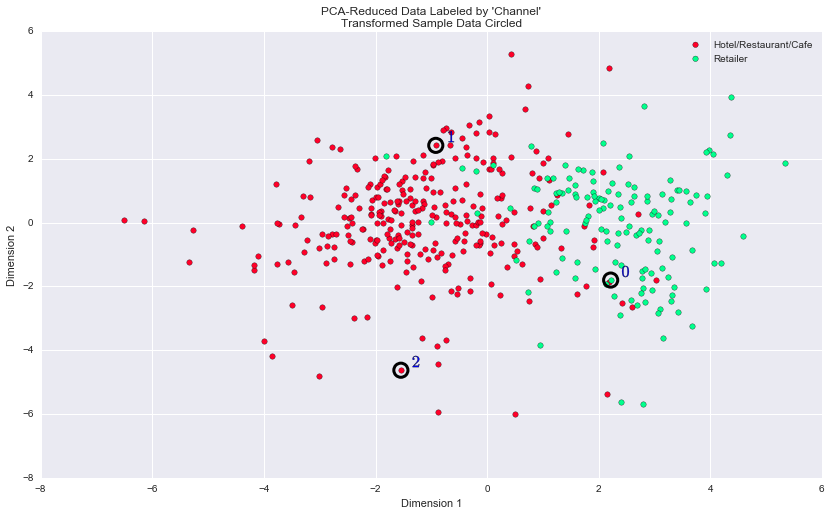

In [319]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**

GMM clustering algorithm and 2 clusters capture majority of points of underlying distributions. However there are some points interfering into 'wrong' segment from both sides. Misclassification of customer 355 found in Question 9 is proved by underlying distributions. A group of some points in upper right corner can be classified as purely 'Retailers' and a group of some points in lower left corner can be classified as purely 'Hotels/Restaurants/Cafes'. In general, estimated segments capture distributor's customers and provide with a good picture of customers distribution. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.